In [33]:
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [24]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
ru_text1 = re.sub('[^а-я ]','', text)

In [25]:
with open('tom_2.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
ru_text2 = re.sub('[^а-я ]','', text)

In [26]:
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
ru_text3 = re.sub('[^а-я ]','', text)

In [27]:
with open('tom_4.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
ru_text4 = re.sub('[^а-я ]','', text)

In [29]:
ru_text = "".join([ru_text1, ru_text2, ru_text3, ru_text4])
len(ru_text)

2763426

In [57]:
RUSS = 'абвгджезийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSS)}

In [58]:
probabilities = np.zeros((len(RUSS), len(RUSS)))

In [59]:
for cp, cn in zip(ru_text[:-1], ru_text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [60]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [61]:
df = pd.DataFrame(probabilities, index=(c for c in RUSS), columns=(c for c in RUSS))

In [62]:
df.head()

,а,б,в,г,д,ж,е,з,и,й,...,ч,ш,щ,ъ,ы,ь,э,ю,я,
а,0.000196,0.008748,0.047077,0.012012,0.027278,0.016752,0.013674,0.056727,0.001858,0.009130,...,0.010690,0.018371,0.003376,0.000000,0.000000,0.000000,0.000042,0.010887,0.034136,0.237949
б,0.065245,0.000600,0.005402,0.000675,0.001525,0.000475,0.141918,0.000050,0.048690,0.000000,...,0.001375,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.014904
в,0.138951,0.000432,0.001043,0.000977,0.007836,0.000028,0.111638,0.012524,0.078979,0.000000,...,0.001015,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000019,0.005186,0.163295
г,0.056217,0.000000,0.002363,0.000066,0.062355,0.000066,0.030714,0.000088,0.043013,0.000000,...,0.001634,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.046744
д,0.165234,0.001248,0.037191,0.000298,0.001050,0.000539,0.170894,0.000099,0.095730,0.000014,...,0.001248,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.041844


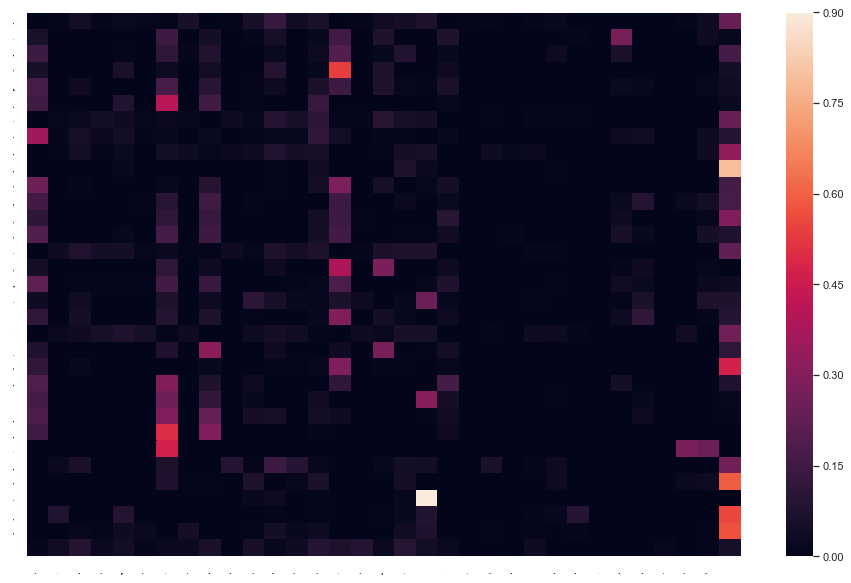

In [63]:
plt.figure(figsize=(16,10))
sns.heatmap(df)
plt.show()

In [67]:
startChar = 'п'
endChar = 'р'
start = POS[startChar]
end = POS[endChar]
prior = 1. / len(RUSS)
result = 0
for c1 in RUSS:
    for c2 in RUSS:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            #print(''.join([startChar, c1, c2, endChar]), proba)
            result += proba
print("Вероятность встретить строку из 4-х символов, которая начинается '%s', а кончается на '%s': %f" % (startChar, endChar, result))

Вероятность встретить строку из 4-х символов, которая начинается 'п', а кончается на 'р': 0.000978


In [92]:
s = []
start = 'б'
s.append(start)
length = 8
i = 0
while i < length:
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSS), p=probabilities[index])
    if next_char == ' ':
        continue
    s.append(next_char)
    i += 1
print ("Слово, начинающееся с буквы '%s' и имеющее длину 8-мь символов: %s" % (start, "".join(s)))

Слово, начинающееся с буквы 'б' и имеющее длину 8-мь символов: брвайлька


In [93]:
from hmmlearn.hmm import GaussianHMM

In [97]:
series = pd.read_csv("numbers-on-unemployment-benefits.csv")
series.columns = ['Month', 'Sum']

In [98]:
series.head()

,Month,Sum
0,1956-01,4742.0
1,1956-02,6128.0
2,1956-03,6494.0
3,1956-04,5379.0
4,1956-05,6011.0
